**bold text**## **Dependencies**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as pltt


Load and preprocess your own image (replace 'your_image.jpg' with the actual filename)

In [ ]:
image = Image.open('test_images/g.jpg').convert('L')
image = image.resize((28,28))
image_array = np.array(image)/255.0
image_array = image_array.reshape(1,28,28,1)


Load the MNIST dataset for training

In [ ]:
(train_images, train_labels), (_, _) = mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
train_images = train_images.astype('float32') / 255.0

Build and train a simple neural network model (CNN)

In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

Compile Model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation for MNIST dataset
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(train_images)

# Train the model
model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=5, steps_per_epoch=len(train_images) / 32)

Use Trained Model

In [ ]:
predictions = model.predict(image_array)
predicted_digit = np.argmax(predictions)
print(f'Predicted digit is: {predicted_digit}')

Predicted digit is: 8


Visualize the test image

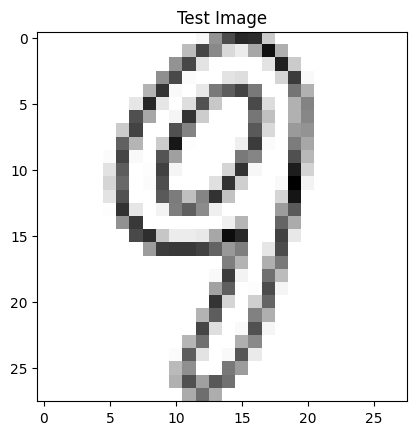

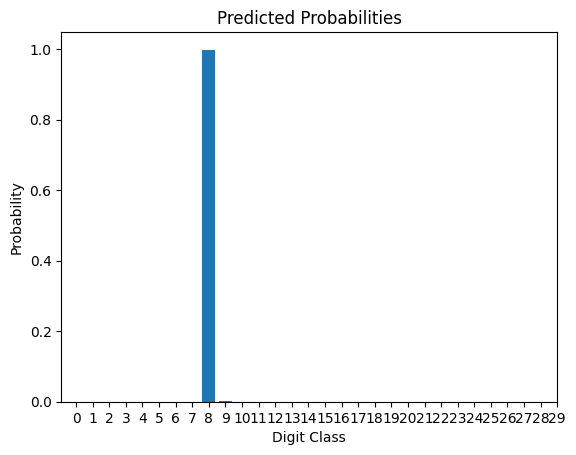

In [ ]:
# Visualize the test image
plt.imshow(image_array[0, :, :, 0], cmap='gray')
plt.title("Test Image")
plt.show()

# Visualize the predicted probabilities for each class
plt.bar(range(10), predictions[0])
plt.xlabel("Digit Class")
plt.ylabel("Probability")
plt.title("Predicted Probabilities")
plt.xticks(range(30))
plt.show()